In [1]:
import pandas as pd
dfdummy = pd.read_csv(r"D:\UKM\Research Assistant\WAIdatahon\makeovermonday-2020w10\Summarization.csv")

#take asean continents only
asean = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
df_asean = dfdummy.loc[dfdummy['Country'].isin(asean)]

#take only years
df_asean['Year'] = pd.DatetimeIndex(df_asean['Survey Year']).year
df_asean.drop(columns=['Survey Year'], inplace=True)

#renaming all columns that needs to be renamed
df_asean.rename(columns={'RecordID': 'Case_ID' }, inplace=True)

#reset index and arrange the columns
df_asean = df_asean.reset_index()
df_asean = df_asean[['Case_ID','Year','Country','Gender','Age','Education','Employment','Marital status', 'Residence', 'Question',
                    'Value']]
df_asean = df_asean.reset_index()
df_asean.set_index('index', inplace=True)

#explode all the data
df_finalized = pd.get_dummies(data=df_asean)

#renaming columns for better analysis
df_finalized.rename(columns={'Country_Cambodia': 'Cambodia',
                         'Country_Indonesia': 'Indonesia',
                         'Country_Myanmar': 'Myanmar',
                         'Country_Philippines' : 'Philippines',
                         'Gender_F': 'Female',
                         'Gender_M' : 'Male',
                         'Age_15-24': '15-24',
                         'Age_25-34' : '25-34',
                         'Employment_Employed for cash' : 'Employed_for_cash',
                          'Employment_Employed for kind': 'Employed_for_kind',
                          'Marital status_Married or living together': 'Married_living_together',
                        'Marital status_Never married' : 'Never_Married',
                        'Marital status_Widowed, divorced, separated' : 'Widowed/divorced/separated',
                          'Residence_Rural' :'Rural',
                          'Residence_Urban': 'Urban',
                          'Question_for at least one specific reason' : 'Specific_reason',
                          'Question_if she argues with him': 'Argues',
                          'Question_if she burns the food': 'Burn_food',
                          'Question_if she goes out without telling him' : 'Go_out_without_telling',
                          'Question_if she neglects the children': 'Neglects_children',
                          'Question_if she refuses to have sex with him': 'Refuse_sex'
                         }, inplace=True)
df_finalized

<ipython-input-1-5e91987702fa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asean['Year'] = pd.DatetimeIndex(df_asean['Survey Year']).year
D:\AnacondaSoftware\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
D:\AnacondaSoftware\lib\site-packages\pandas\core\frame.py:4293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

,Case_ID,Year,Value,Cambodia,Indonesia,Myanmar,Philippines,Female,Male,15-24,...,Never_Married,Widowed/divorced/separated,Rural,Urban,Specific_reason,Argues,Burn_food,Go_out_without_telling,Neglects_children,Refuse_sex
index,,,,,,,,,,,,,,,,,,,,,
0,361,2014,44.9,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,81,2014,20.2,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,11,2014,9.4,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,151,2014,25.3,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,221,2014,39.0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,194,2017,4.4,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
552,264,2017,10.6,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
553,404,2017,8.5,0,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


Automatically created module for IPython interactive environment
X =  [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]]
Y =  [44.9 20.2  9.4 25.3 39.   8.9 43.5 48.7 21.7 10.1 30.3 11.  56.1 29.9
 15.8 38.5 48.7 18.6 18.5  6.2  1.1  7.6 15.5  0.8 57.6 31.5 17.6 38.
 50.3 20.1 56.  27.7 14.4 36.6 49.4 15.5 42.8 18.4  7.5 24.9 37.4  8.
 49.7 24.4 11.8 32.1 13.1 24.9 58.  11.9 33.3 51.2 15.6 47.5 21.5 11.4
 28.  41.7 10.8 26.  53.3 12.4 35.1 47.2 14.1 40.6 18.   9.3 21.7 34.9
  8.3 49.5 13.9 29.7 42.1 16.  52.7 12.9 33.5 46.2 14.2 37.  14.4  6.5
 21.5 32.7  6.3  2.1 24.9 10.6 10.5 17.3  3.6  1.  23.9  8.9 11.7 18.2
  2.3 29.4 14.1  2.4 15.4 22.   5.7  4.9  0.7  0.   1.3  3.1  0.7 35.5
 16.1  0.7 20.3 25.   2.7 32.2 14.6  2.2 15.6 22.9  5.6  3.   2.  22.6
  9.1 10.4 17.6 26.8 11.8  1.8 12.9 19.4  3.8 22.8 13.9 27.5  9.3  1.9
  5.4 16.3  5.9  5.7 12.1 27.  11.5  1.7 13.8 20.3  3.7 23.8 10.3  9.9
 16.5  4.  29.7 15.6  4.  

<Figure size 432x288 with 0 Axes>

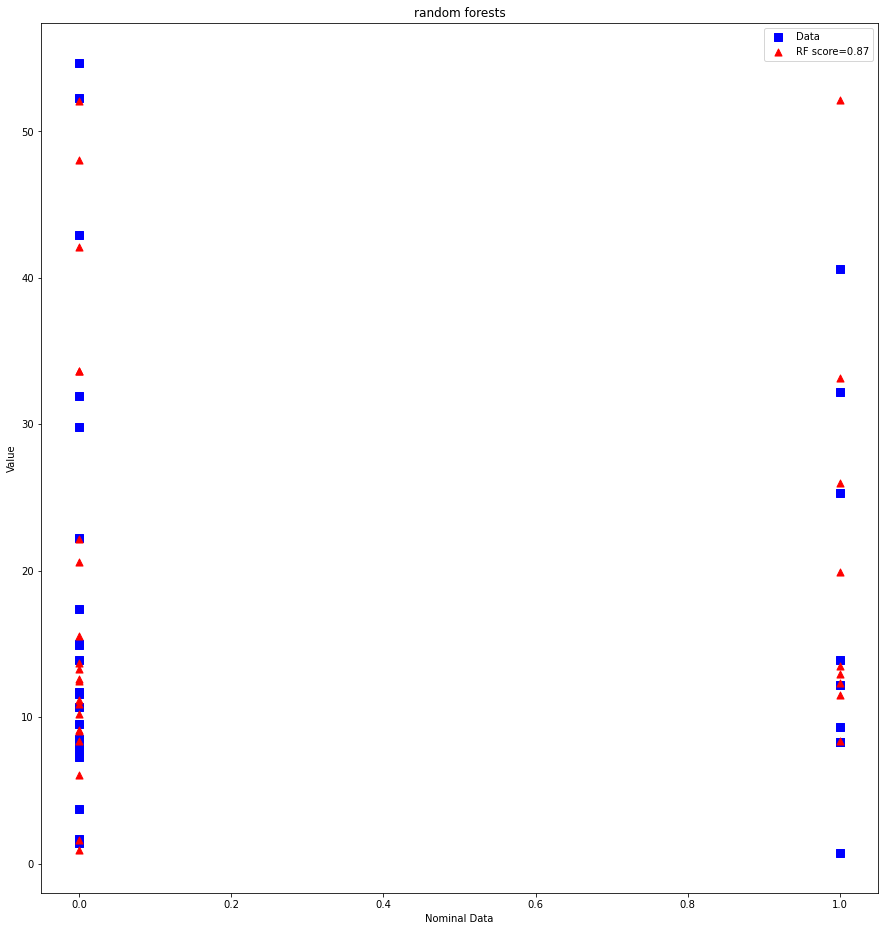

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Y = df_finalized.iloc[:, 2].valuesds
X = df_finalized.iloc[:, 3:30].values

X_train, X_test, y_train, y_test = train_test_split(
    X,Y, test_size=0.2, random_state=4)

max_depth = e
regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
                                random_state=4)
regr_rf.fit(X_train, y_train)

# Predict on data
print('X = ',X)
print('Y = ', Y)
y_rf = regr_rf.predict(X_test)

# Plot the results
plt.figure()
s = 50
a = 1
plt.figure(figsize=(15,16))

#Current Data Plotting
plt.scatter(X_test[:30,0],y_test[:30], c='blue',
            s=s, marker="s", alpha=a, label="Data")

#Forecast Data Plotting
plt.scatter(X_test[:30,0], y_rf[:30], c='red',
             s=s, marker="^", alpha=a,
            label="RF score=%.2f" % regr_rf.score(X_test, y_test))

plt.xlabel("Nominal Data")
plt.ylabel("Value")
plt.title("random forests")
plt.legend()
plt.show()

In [3]:
print(regr_rf.score(X_train, y_train))
print(regr_rf.score(X_test, y_test))

0.9900264012265909
0.8736135567413157


In [4]:
X1 = X_test[0]
Y1 = y_test[0]

print(X1,Y1)
regr_rf.predict([X1])

[0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0] 7.9


array([9.127])

In [5]:
X1 = X[4]
Y1 = Y[4]

print(X1,Y1)
regr_rf.predict([X1])

[1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0] 39.0


array([41.971])

In [6]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_rf))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_rf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_rf)))

Mean Absolute Error: 3.226321428571428
Mean Squared Error: 24.66296016071426
Root Mean Squared Error: 4.966181647978078


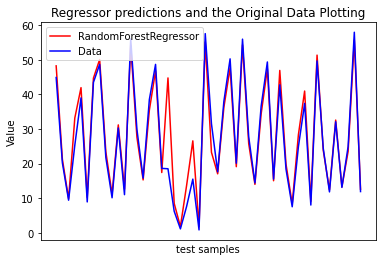

In [13]:
xt = X[:50]

pred1 = regr_rf.predict(xt)

plt.figure()

plt.plot(pred1, 'r-', label='RandomForestRegressor')
plt.plot(Y[:50], 'b-', label='Data')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Value')
plt.xlabel('test samples')
plt.legend(loc="best")
plt.title('Regressor predictions and the Original Data Plotting')

plt.show()